## Hydrology 

### Balance indicators

- Observed vs sim. discharge/rainfall ratio (i.e. insights on real ETP)

In [1]:
import mpld3
mpld3.enable_notebook()

import seaborn as sns
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.set(style="whitegrid")

# Plot graphs within this document
# %matplotlib inline
%matplotlib notebook
# For non notebook: https://stackoverflow.com/questions/9651092/my-matplotlib-pyplot-legend-is-being-cut-off

In [2]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np

from obs_data import *

print(os.getcwd())

/Users/DayTightChunks/Documents/PhD/Models/.nosync/pesti-beach16/Analysis


In [3]:
PC = False
version = "v10"
folder = "1"

In [4]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v10/


### Observed

In [5]:
name_tss = "accRain_m3"
filename = "resW_" + name_tss + ".tss"
col = "Rain"

# Rain (m3)
rain_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)
# Q (m3)
q_obs = getWaterData(tss=True)
q_obs.loc[q_obs.Qm3 < 0,'Qm3'] = np.nan
q_obs[280:].head(10)

# Q sim
name_tss = "n_accVol_m3"
filename = "resN_" + name_tss + ".tss"
col = "Qsim"

q_sim_m3 = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

In [6]:
# Julian days
start = 180
end = 290

qObs = q_obs[start:end]
qSim = q_sim_m3[start:end]
rain = rain_m3[start:end]

obs = qObs.merge(rain, left_on='Jdays', right_on='Jdays', how='outer')
so = obs.merge(qSim, left_on='Jdays', right_on='Jdays', how='outer')

In [7]:
so.tail(10)

,Jdays,Qm3,Rain,Qsim
100,281,64.483,0.000,139.407
101,282,58.464,0.000,139.323
102,283,56.186,0.000,139.263
103,284,54.981,0.000,139.204
104,285,53.592,6576.360,254.727
105,286,22.995,0.000,139.046
106,287,NaN,2630.540,139.971
107,288,NaN,0.000,138.887
108,289,NaN,93.948,138.785
109,290,NaN,0.000,138.681


In [8]:
x = so.Jdays.tolist()
# rest_obs = rain.div(qObs, fill_value=1)
rest_obs = (so.Rain/so.Qm3).tolist()
rest_sim = (so.Rain/so.Qsim).tolist()

In [9]:
traceObs = go.Scatter(
    x = x,
    y = rest_obs,
    mode = 'lines',
    name = 'Restitution',
    marker=dict(
        color= 'green')
)

traceSim = go.Scatter(
    x = x,
    y = rest_sim,
    mode = 'lines',
    name = 'Restitution Sim.',
    marker=dict(
        color= 'blue')
)

In [10]:
data = [traceObs, traceSim]
figname = "Restitution.png"

%matplotlib inline
import plotlycred

online = True
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data) # , layout=layout)
    py.image.save_as(fig, filename=figname)
else:
    iplot(data)


### Restitution
https://plot.ly/~DayTimeChunks/7/ 


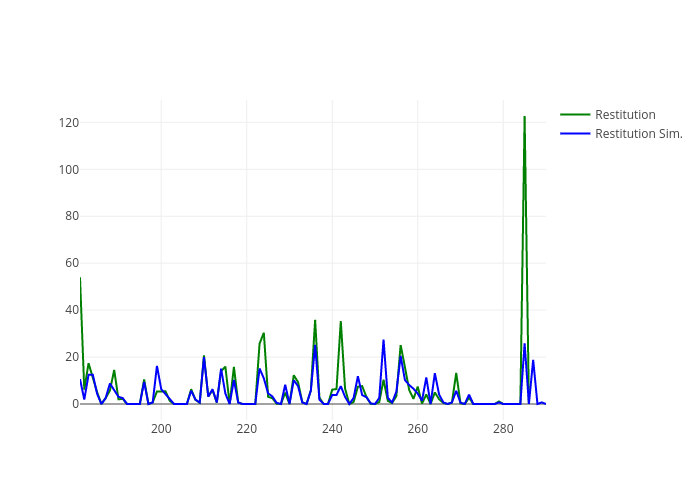

In [11]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)